# Contrôle Continu de Méthodes Numériques Probabilistes
### 10 Janvier 2020

In [1]:
%matplotlib inline
from math import *
import numpy as  np  
import scipy as sp
from pylab import *
from numpy import random as rd
from numpy.linalg import norm

<span style="color: #fb4141">Saimourya SURABHI et Maéva CAILLAT</span>

## Exercice 1.

On considère dans cet exercice une méthode d'estimation du nombre $\pi$ reposant sur le calcul de l'aire d'un quart de disque. On note $B = [0,1]\times[0,1]$ et $A= B\cap B(0,1)$, où $B(0,1)$ est le disque centré en 0 et de rayon 1. 

> **Question 1.** Ecrire une fonction qui retourne $n$ réalisations indépendantes de la loi uniforme sur $A$.

In [3]:
def unifA(n) : 
    A = []
    c = 0
    while(c<n):
        x = rd.uniform(0,1,2)
        if (norm(x)<=1):
            A.append(x)
            c += 1
    return(np.asarray(A))

unifA(10)

array([[0.41377516, 0.1372329 ],
       [0.39788443, 0.31870765],
       [0.29769084, 0.5949891 ],
       [0.53316579, 0.80744865],
       [0.92042238, 0.26522456],
       [0.21369789, 0.89562075],
       [0.65899686, 0.69169034],
       [0.19350038, 0.11238798],
       [0.21305187, 0.31206687],
       [0.10897857, 0.04302939]])

> **Question 2.** Quelle est la loi de ${\mathbf{1}}_{U\in A}$ où $U$ est une variable aléatoire suivant la loi uniforme sur $B$ ?

<font color='blue'>
Soit $X={\mathbf{1}}_{U\in A}$, $X \sim Bernouilli(p)$ <br> 
Déterminons p.
$$
p = E(X) = \int_B {\mathbf{1}}_{u\in A}d{P}_U (u)
$$

$X$ est une variable aléatoire positive donc on peut appliquer le théorème de Fubini positif :
$$
p = \int_0^1 \int_0^1 {\mathbf{1}}_{u_1^2+u_2^2 \leq 1} du_2 du_1 
= \int_0^1 \int_0^{\sqrt{1-u_1^2}} du_2 du_1 
= \int_0^1 \sqrt{1-u_1^2} du_1
$$
Avec le changement de variable $u_1 = sin(y)$, on a :
$$
p = \int_0^{\frac{\pi}{2}} cos(y)^2 dy = \int_0^{\frac{\pi}{2}} \frac{1+cos(2y)}{2} dy = [\frac{y}{2} + \frac{sin(2y)}{4}]_0^{\frac{\pi}{2}}
= \frac{\pi}{4}
$$
Ainsi, ${\mathbf{1}}_{U\in A} \sim Bernouilli(\frac{\pi}{4})$.



> **Question 3.** En déduire un estimateur de $\pi$ utilisant $n$ réalisations i.i.d. selon la loi uniforme sur $A$, qu'on notera $\hat\pi_n$. Quelle est la variance de cet estimateur ?

<font color='blue'>
    
Soit $U_1, ..., U_n$ n variables aléatoires i.i.d. qui suivent la loi uniforme sur A. <br>
D'après la loi forte des grands nombres appliquée à ${\mathbf{1}}_{U\in A}$, 
$\frac{1}{n} \sum \limits_{k=1}^n {\mathbf{1}}_{U_k\in A}
\underset{n \to +\infty}{\overset{p.s.}{\longrightarrow}} E({\mathbf{1}}_{U\in A}) = p = \frac{\pi}{4} $ <br>
    
Un estimateur sans biais $\hat{\pi}_n$ de $\pi$ est : $\hat{\pi}_n = \frac{4}{n} \sum \limits_{k=1}^n {\mathbf{1}}_{U_k\in A}$.
<br>
$Var(\hat\pi_n) = \frac{16}{n^2} Var(\sum_{k=1}^n \mathbf{1}_{U_k \in A}) 
= \frac{16}{n} Var(\mathbf{1}_{U_1 \in A}) = \frac{16}{n} \frac{\pi}{4} (1 - \frac{\pi}{4})$ <br>
Donc,
$$
Var(\hat\pi_n) = \frac{4\pi}{n}(1 - \frac{\pi}{4}) \simeq \frac{2.7}{n}
$$

> **Question 4.**  Tracer une trajectoire de l'estimateur $\hat\pi_n$ en fonction de $n$. Qu'observez-vous ? Quelle loi statistique permet d'expliquer ce phénomène ?

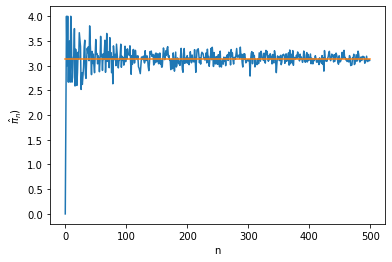

In [4]:
def pi_n(n):
    c = 0
    for k in range(n):
        U = rd.uniform(0,1,2)
        if (norm(U)<=1):
            c += 1
    p = 4*c/n
    return(p)

n = 500
plt.xlabel("n")
plt.ylabel("$\hat \pi_n)$")
plt.plot([pi_n(i) for i in range(1,n+1)])
plt.plot([np.pi for i in range(1,n+1)])

<font color='blue'>
    
$\hat \pi_n$ semble converger vers $\pi$ quand n tend vers $+\infty$
En effet, d'après la loi forte des grands nombres, 
$\hat \pi_n
\underset{n \to +\infty}{\overset{p.s.}{\longrightarrow}} \pi $

> **Question 5.**  Donner l'expression de 4 intervalles de confiance de niveau de confiance $1-\alpha$ avec $\alpha = 0.05$ pour $\pi$ à partir de $\hat\pi_n$ en utilisant (i) l'inégalité de Chebychev, (ii) le théorème central limite, (iii) l'inégalité de Hoeffding et (iv) l'inégalité de Bernstein. On discutera dans chaque cas les conditions d'application de l'inégalité. Estimer ces intervalles de confiance pour $n=1000$.

<font color='blue'>
   
(i) Par l'inégalité de Chebychev

Condition d'application de l'inégalité : $Var(\hat\pi_n) < +\infty$
$$
P(|\hat\pi_n-\pi| \geq t) \leq \frac{Var(\hat\pi_n)}{t^2}
= \frac{4\pi}{n t^2}(1 - \frac{\pi}{4})
$$
<br>
On veut obtenir :
$$
P(|\hat\pi_n-\pi| \geq t_\alpha) \leq \alpha
$$
On prend donc :
$$
\alpha = \frac{4\pi}{n t^2}(1 - \frac{\pi}{4})
$$
$$
t_\alpha = \sqrt{\frac{\pi(4-\pi)}{n\alpha}}
$$
<br>
Comme on cherche à estimer $\pi$, on prend plutôt : $\hat t_\alpha = \sqrt{\frac{\hat\pi_n(4-\hat\pi_n)}{n\alpha}}$.

On a donc l'intervalle de confiance de niveau $1-\alpha$ suivant:
$$
I_n^{chebychev} = \left[\hat\pi_n-\sqrt{\frac{\hat\pi_n(4-\hat\pi_n)}{n\alpha}},\hat\pi_n+\sqrt{\frac{\hat\pi_n(4-\hat\pi_n)}{n\alpha}}\right]
$$
<br>
    
(ii) Par le théorème centrale limite (TCL)

Conditions d'application de l'inégalité :
- $X_i = \mathbf{1}_{U_i\in A}$ admettent un moment d'ordre et $4 \overline{X_n} = \hat\pi_n$.
- $\mathbf{1}_{U_i\in A}$ sont des variables aléatoires i.i.d.

D'après le TCL, on a :
$$
\sqrt n \frac{\overline{X_n}-E(X)}{\sqrt{Var(X)}} \underset{n \to +\infty}{\overset{Loi}{\longrightarrow}} Z \sim \mathcal{N}(0,1)
$$
d'où
$$
\frac{\hat\pi_n-\pi}{\sqrt{Var(\hat\pi_n)}} \underset{n \to +\infty}{\overset{Loi}{\longrightarrow}} Z \sim \mathcal{N}(0,1)
$$
<br>
Un intervalle de confiance de niveau $1-\alpha$ de Z est :
<br>
$$
P(|Z| \geq q_{1-\frac{\alpha}{2}}) = \alpha
$$
<br>
Ainsi un intervalle de confiance de niveau $1-\alpha$ de $\pi$ est :
$$
I_n^{TCL} = \left[\hat\pi_{n} - \sqrt{\frac{\hat\pi_n(4-\hat\pi_n)}{n}}q_{1-\frac{\alpha}{2}},\hat\pi_n+\sqrt{\frac{\hat\pi_n(4-\hat\pi_n)}{n}}q_{1-\frac{\alpha}{2}}\right]
$$
<br>
<br>

(iii) Par l'inégalité de Hoeffding

Conditions d'application de l'inégalité :
- $X_i = \mathbf{1}_{U \in A}$ doit être borné, ce qui est le cas car à valeurs dans $[0,1]$.
- Les $X_i$ sont indépendantes.
- Les $X_i$ admettent un moment d'ordre 1.

Dans le cas i.i.d, on a :
<br>
$$
P(|\hat\pi_n - \pi| \geq t) \leq 2 \exp\left(\frac{-n t^2}{2 \hat\pi_n(4-\hat\pi_n)}\right)
$$
<br>
Pour $t_\alpha = \sqrt{\frac{2 \hat\pi_n (4-\hat\pi_n)\ln(2/\alpha)}{n}}$, on a alors :
<br>
$$
P(|\hat\pi_n - \pi| \geq t_\alpha) \leq \alpha
$$
<br>
D'où l'intervalle de confiance suivant pour $\pi$ :
<br>
<br>
$$
I_n^{Hoeffding} = \left[\hat\pi_{n} - \sqrt{\frac{2 \hat\pi_n (4-\hat\pi_n)\ln(2/\alpha)}{n}},\hat\pi_n+\sqrt{\frac{2 \hat\pi_n (4-\hat\pi_n)\ln(2/\alpha)}{n}}\right]
$$
<br>
<br>
    
(iv) Par l'inégalité de Bernstein

Conditions (suffisantes) d'application de l'inégalité :
- $X_i = \mathbf{1}_{U \in A}$ doit être borné, ce qui est le cas car à valeurs dans $[0,1]$.
- $Var(X) = \tau ^2$ avec $\tau = \frac{\sqrt{\pi(4-\pi)}}{4}$.
- $|X - E(X)| \leq b$ avec $b = \frac{\pi}{4}$.

Dans le cas i.i.d, on a :
<br>
$$
P(|\hat\pi_n - \pi| \geq t) \leq 2 \exp\left(\frac{-n t^2}{2 \hat\pi_n(4-\hat\pi_n+t)}\right)
$$
<br>

In [5]:
n = 1000
alpha = 0.05

x = pi_n(n)

t_che = np.sqrt(x*(4-x)/(n*alpha))
t_tcl = np.sqrt(x*(4-x)/n)*1.96
t_hoef = np.sqrt((2*x*(4-x)*np.log(2/alpha))/n)

I_che = [x-t_che, x+t_che]
I_tcl = [x-t_tcl, x+t_tcl]
I_hoef = [x-t_hoef, x+t_hoef]

print("Valeur de l'estimateur : ", x)
print("L'intervalle de confiance de pi par Chebychev est : ", I_che)
print("L'intervalle de confiance de pi par le TCL est : ", I_tcl)
print("L'intervalle de confiance de pi par Hoeffding est : ", I_hoef)

Valeur de l'estimateur :  3.212
L'intervalle de confiance de pi par Chebychev est :  [2.987008622387435, 3.4369913776125656]
L'intervalle de confiance de pi par le TCL est :  [3.113393181120168, 3.3106068188798323]
L'intervalle de confiance de pi par Hoeffding est :  [3.075348907976469, 3.3486510920235313]


> **Question 6.**  Pour quelle valeur de $n$ l'inégalité de Hoeffding permet-elle d'obtenir un intervalle de confiance de niveau $1-\alpha = 0.95$ et de longueur 0.01 ? Vérifier numériquement.

Il faut que $2 \sqrt{\frac{2 \hat\pi_n (4-\hat\pi_n)\ln(2/\alpha)}{n}} = 0.01 = l$
Soit :
$$
n = \frac{8 \hat\pi_n (4-\hat\pi_n) \ln(2/\alpha)}{l^2} \approx 795843
$$

In [6]:
n = 795843

t_hoef = np.sqrt((2*x*(4-x)*np.log(2/alpha))/n)
I_hoef = [x-t_hoef, x+t_hoef]
print("L'intervalle de confiance de pi par Hoeffding est : ", I_hoef)
print("La longueur de cet intervalle est : ", 2*t_hoef)

L'intervalle de confiance de pi par Hoeffding est :  [3.207156052736646, 3.2168439472633543]
La longueur de cet intervalle est :  0.009687894526707898


## Exercice 2

On considère ici une méthode pour estimer le nombre $\pi$ qui repose sur le calcul de l'intégrale de la fonction $f:x\mapsto\frac{1}{1+x^2}$ entre 0 et 1.

> **Question 1.** Calculer théoriquement la valeur de $I = \int_{0}^{1}f(x) dx$.

<font color='blue'>
$$
I = \int_{0}^{1}f(x) dx = [\arctan(x)]_0^1 = \frac{\pi}{4}
$$

> **Question 2.** En interprétant $I$ comme une espérance, proposer un estimateur sans biais $\hat I_n$ de $\pi$.

<font color='blue'>
    
Soit $X_{1}, ..., X_{n}$ des variables aléatoires i.i.d. qui suivent $U(0,1)$. Alors $I = E(f(X_{1}))$ <br>
D'après la loi forte des grands nombres, $\frac{1}{n} \sum \limits_{k=1}^n f(X_{k}) \underset{n \to +\infty}{\overset{p.s.}{\longrightarrow}} I $ <br>
On propose donc comme estimateur sans biais $\hat{I}_n$ de $\pi$ : $\hat{I}_n = \frac{4}{n} \sum \limits_{k=1}^n f(X_{k})$.

> **Question 3.** 

> **3.a**  Calculer la variance théorique de l'estimateur $\hat I_n$. Indication: on cherchera à déterminer deux réels $a$ et $b$ tels que $\int_{0}^x\frac{1}{(1+y^2)^2} dy = a\left(b\frac{x}{1+x^2}+\arctan(x)\right)$.

<font color='blue'>
$$
Var(\hat{I}_n) = \frac{16}{n} (E(f(X_1)^2)-E(f(X_1))^2)
$$ <br>
$$
\int_{0}^x f^2
= \int_{0}^x\frac{1}{(1+y^2)^2} dy
= \int_{0}^x\frac{1+y^2-y^2}{(1+y^2)^2}dy
= \int_{0}^x\left(\frac{1}{1+y^2}-\frac{y^2}{(1+y^2)^2}\right)dy
= \arctan(x) - \int_{0}^x \frac{y^2}{(1+y^2)^2}dy
$$ <br> <br>
Soit $g(y) = \frac{y}{1+y^2}$ alors $g'(y) = \frac{1-y^2}{(1+y^2)^2}$ <br>
$$
- \int_{0}^x \frac{y^2}{(1+y^2)^2}dy 
= \int_{0}^x \frac{1-y^2-1}{(1+y^2)^2}dy
= \int_{0}^xg' - \int_{0}^x f^2
$$ <br><br>
d'où :
$$
\int_{0}^x f^2 = \arctan(x) + \int_{0}^x g' -\int_{0}^x f^2
= \frac{1}{2} ( \arctan(x) + \frac{x}{1+x^2} )$$
donc a = $\frac{1}{2}$ et b = 1 <br>
On a alors :
$$
Var(\hat{I}_n) 
= \frac{16}{n}(\frac{1}{2}(\frac{1}{1+1^2}+arctan(1))-\frac{\pi^2}{16})
= \frac{1}{n}(4+2\pi - \pi^2)
$$
  

> **3.b** Rappeler l'expression de l'estimateur sans biais de la variance.

<font color='blue'>

On pose $\forall i$  $Y_i = f(X_i)$, on a donc pour l'estimateur sans biais de la variance de $Y_{i}$:
$$
S^2_n = \frac{1}{n-1}\sum_{i=1}^n(Y_i-\overline{Y_n})^2 
= \frac{1}{n-1} \sum_{i=1}^n Y_i^2 - \frac{n}{n-1} \overline{Y_n}^2
\underset{n \to +\infty}{\overset{L}{\longrightarrow}} Var(Y) 
= \frac{n}{16}Var(\hat{I}_n)
$$

> **3.c** Illustrer la convergence de cet estimateur sans biais de la variance vers la valeur théorique de la variance de $\hat I_n$.

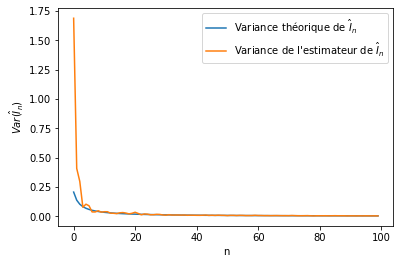

In [7]:
n = 100

def f(x):
    return(1/(1+x**2))
    
def Yn_bar(n):
    Yn = 0
    x = rd.uniform(0,1,n)
    for i in range(n):
        Yn += f(x[i])
    Yn = Yn/n
    return(Yn)

def Sn2(n):
    S = 0
    y = Yn_bar(n)
    x = rd.uniform(0,1,n)
    for i in range(n):
        S += (f(x[i])-y)**2
    S = (1/(n-1))*S
    return(S)

def var_theo(n):
    v = (1/n)*(4+2*np.pi-(np.pi)**2)
    return(v)

plt.xlabel("n")
plt.ylabel("$Var(\hat I_n)$")
plt.plot([var_theo(i) for i in range(2,n+2)])
plt.plot([(16/i)*Sn2(i) for i in range(2,n+2)])
plt.legend(["Variance théorique de $\hat I_n$","Variance de l'estimateur de $\hat I_n$"])

> **3.d** Quels théorèmes vous permettent de justifier cette convergence ?

<font color='blue'>

$$
S^2_n = \frac{1}{n-1} \sum_{i=1}^n Y_i^2 - \frac{n}{n-1} \overline{Y_n}^2
$$
D'après la loi forte des grands nombres appliquée à $Y^2$ :
$$
\frac{1}{n-1} \sum_{i=1}^n Y_i^2 
\underset{n \to +\infty}{\overset{p.s.}{\longrightarrow}} E(Y^2)
$$
D'après la loi forte des grands nombres appliquée à Y et comme la convergence presque sûre implique la convergence en loi :
$$
\overline{Y_n}^2 
\underset{n \to +\infty}{\overset{L}{\longrightarrow}} E(Y)^2
$$
$$
\frac{n}{n-1} \underset{n \to +\infty}{\overset{p}{\longrightarrow}} 1
$$
Donc d'après le théorème de Slutsky :
$$
\frac{n}{n-1} \overline{Y_n}^2
\underset{n \to +\infty}{\overset{L}{\longrightarrow}} E(Y)^2
$$
D'où :
$$
S^2_n \underset{n \to +\infty}{\overset{L}{\longrightarrow}} Var(Y)
$$

**Méthodes de réduction de variance.**

Afin de réduire la variance de l'estimateur précédent, on se propose d'appliquer trois techniques de réduction de variance: la première étant la méthode d'échantillonnage avec des variables antithétiques, la seconde étant la méthode de stratification, la troisième une méthode de variable de contrôle.

> **Question 4.** **Variables antithétiques.**

> **4.a** Rappeler brièvement le princide de cette méthode. Quelles variables antithétiques proposez-vous ici ? Donner l'expression du nouvel estimateur de $\pi$, qu'on note $\hat I^{VA}_n$.

<font color='blue'>
Soit $(X_1,...,X_{n/2})$ un $\frac{n}{2}$-échantillon de $U(0,1)$. On définit un autre $\frac{n}{2}$-échantillon de même loi $(X'_1,...,X'_{n/2})$ tel que $\forall i$ $X'_i = 1 - X_i$. Ainsi les variables antithétiques sont les $(X_{i})$ et les $(X'_{i})$. <br>
Le nouvel estimateur sans biais de $\pi$ est : 
$$
\hat I^{VA}_n = \frac{4}{n} \sum_{i=1}^{n/2} f(X_i)+f(1-X_i)  
$$

> **4.b** Justifier théoriquement que la variance de $\hat I^{VA}_n$ est inférieure à celle de $\hat I_n$. Comparer numériquement les variances de ces estimateurs.

<font color='blue'>
$Var(\hat I_n) = \frac{16}{n} Var(f(X_1))$ et $Var(\hat I^{VA}_n) = Var(\hat I_n) + \frac{16}{n} Cov[f(X_1),f(1-X_1)]$ <br>
Par ailleurs, $x \mapsto f(x) $ est monotone (décroissante) sur $[0;1]$ et $x \mapsto \phi(x) = 1-x $ est non croissante sur ce même segment donc, d'après un théorème du cours :
$$
Cov[f(X_1),f(\phi(X_1))] \leq 0
$$
Par conséquent :
$$
Var(\hat I^{VA}_n) \leq Var(\hat I_n) 
$$

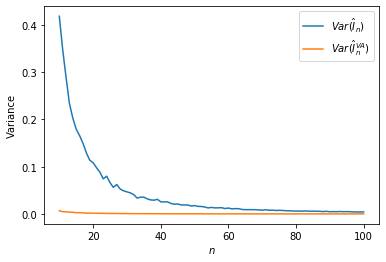

In [8]:
def I_va(n) :
    In = 0
    x = rd.uniform(0,1,int(n/2))
    for i in range(int(n/2)) :
        In += f(x[i]) + f(1-x[i])
    return(4*In/n)

def var_I(n,p) :
    L = []
    for i in range(1,n+1) :
        I = []
        for j in range(n,p) :
            I.append(4*Yn_bar(i))
        L.append(n*np.var(I)/i)
    return(L)

def var_I_va(n,p) :
    L = []
    for i in range(1,n+1) :
        iva = []
        for j in range(p) :
            iva.append(I_va(i))
        L.append(n*np.var(iva)/i)
    return(L)

n = 100
p = 1000

y = var_I(n,p)
y_va = var_I_va(n,p)

plt.xlabel("$n$")
plt.ylabel("Variance")

plt.plot(range(10,n+1),y[9:])
plt.plot(range(10,n+1),y_va[9:])

plt.legend(["$Var(\hat I_n$)","$Var(\hat I^{VA}_n)$"])

> **Question 5.** **Stratification.**

> **5.a** Ecrire un estimateur de Monte-Carlo de $I$ avec méthode de stratification utilisant les événements $E_1 = \left\{U\in\left[0,\frac12\right]\right\}$ et $E_2 = \left\{U\in\left[\frac12,1\right]\right\}$ pour $U$ une variable aléatoire uniforme sur $[0,1]$. On notera cet estimateur $\hat I^{ST}_n$.

<font color='blue'>
    
$(E_{1}, E_{2})$ est un ensemble complet d'événements incompatibles. <br>
Alors :
$$
I = E(f(U)) = E(f(U) | E_1) P(E_1) + E(f(U) | E_2) P(E_2)  
$$
Comme $U \sim U(0,1)$, $P(E_1) = P(E_2) = \frac{1}{2}$, d'où :
$$
I = \frac{E(f(U) | E_1) + E(f(U) | E_2)}{2}
$$

L'estimateur de Monte-Carlo de I avec méthode de stratification est donc :
$$
\hat I^{ST}_n = \frac{1}{2 n_1} \sum_{i=1}^{n_1} f(U_i^{(1)}) + \frac{1}{2 n_2} \sum_{i=1}^{n_2} f(U_i^{(2)})
$$
où $U_i^{(1)}$ et $U_i^{(2)}$ sont des variables i.i.d. suivant respectivement les loi $U(0,1)| E_1$ et $U(0,1)| E_2$.

> **5.b** Quelle est la loi de $U$ sachant $E_i$ pour i=1,2 ?

<font color='blue'>
$$ 
U | E_{1} \sim U(0,\frac{1}{2})
$$
$$
U | E_{2} \sim U(\frac{1}{2},1)
$$

> **5.c** Pour une taille d'échantillon $n$, comment choisir le nombre de réalisations selon la loi de $U$ sachant $E_1$ et le nombre de réalisations selon la loi de $U$ sachant $E_2$ afin de minimiser la variance de l'estimateur. Justifier.

<font color='blue'>

On cherche à avoir une stratification optimale, i.e. une variance de l'estimateur minimale.
On fait les calculs pour $n_1$ (même calculs pour $n_2 = n - n_1$). <br>
Soit $\sigma^2 = Var(f(U_1^{(1)})) = Var(f(U_1^{(2)}))$. <br>
$$Var(I^{ST}_n)= \frac{\sigma^2}{4}(\frac{1}{n_1} + \frac{1}{n-n_1})$$. 
Sa dérivée vaut $-\frac{\sigma^2}{4 n_1^2} + \frac{\sigma^2}{4 (n-n_1)^2}$ et elle s'annule en $n_1 = \frac{n}{2}$. <br>
Ainsi, dans le cas où $n$ est paire, la variance de l'estimateur est minimale pour :
$$
n_1 = \frac{n}{2} = n_{2}
$$
Ainsi, la stratification optimale est la stratification proportionnelle dans ce cas.

> **5.d** Comparer numériquement la variance de $\hat I^{ST}_n$ avec celle de $\hat I_n$, pour une stratification proportionnelle ou optimale. 

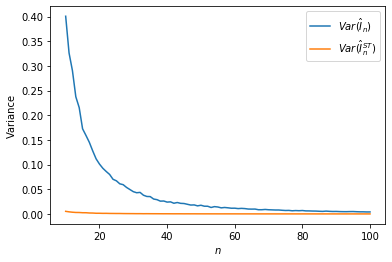

In [9]:
def I_st(n) :
    In = 0
    u1 = rd.uniform(0,1/2,int(n/2))
    u2 = rd.uniform(1/2,1,int(n/2))
    for i in range(int(n/2)) :
        In += f(u1[i]) + f(u2[i])
    return(In/n)

def var_I_st(n,p) :
    L = []
    for i in range(1,n+1) :
        ist = []
        for j in range(p) :
            ist.append(I_st(i))
        L.append(n*np.var(ist)/i)
    return(L)

n = 100
p = 1000
y = var_I(n,p)
y_st = var_I_st(n,p)

plt.xlabel("$n$")
plt.ylabel("Variance")

plt.plot(range(10,n+1),y[9:])
plt.plot(range(10,n+1),y_st[9:])

plt.legend(["$Var(\hat I_n$)","$Var(\hat I^{ST}_n)$"])

> **5.e** Reprendre les questions 5a à 5d pour deux intervalles $\left[0,\frac13\right]$ et $\left[\frac13,1\right]$. Commenter.

<font color='blue'>
$E_1 = \left\{U\in\left[0,\frac13\right]\right\}$ et $E_2 = \left\{U\in\left[\frac13,1\right]\right\}$    <br>
$(E_{1}, E_{2})$ est un ensemble complet d'événements incompatibles. <br>
Alors :
$$
I = E(f(U)) = E(f(U) | E_1) P(E_1) + E(f(U) | E_2) P(E_2)  
$$
avec : $P(E_1) = \frac13$ et $P(E_2) = \frac23$, d'où :
$$
I = \frac{E(f(U) | E_1) + 2 E(f(U) | E_2)}{3}
$$

L'estimateur de Monte-Carlo de I avec méthode de stratification est donc :
$$
\hat I^{ST}_n = \frac{1}{3 n_1} \sum_{i=1}^{n_1} f(U_i^{(1)}) + \frac{2}{3 n_2} \sum_{i=1}^{n_2} f(U_i^{(2)})
$$
où $U_i^{(1)}$ et $U_i^{(2)}$ sont des variables i.i.d. suivant respectivement les loi $U(0,1)| E_1$ et $U(0,1)| E_2$.
$$ 
U | E_{1} \sim U(0,\frac13)
$$
$$
U | E_{2} \sim U(\frac13,1)
$$
On cherche à avoir une stratification optimale, i.e. une variance de l'estimateur minimale.
On fait les calculs pour $n_1$ (même calculs pour $n_2 = n - n_1$). <br>
Ainsi, dans le cas où $n$ est divisible par 5, la variance de l'estimateur est minimale pour :
$$
n_{1,opti} = n \times \frac{P(E_1)\sigma_1}{P(E_1)\sigma_1 + P(E_2)\sigma_2} 
= n \times \frac{\frac19 \frac{1}{\sqrt{12}}}{\frac19 \frac{1}{\sqrt{12}} + \frac49 \frac{1}{\sqrt{12}}} 
= \frac{n}{5}
$$
Pour avoir une stratification proportionnelle, il faut prendre :
$$n_{1,prop} = \frac{n}{3}$$

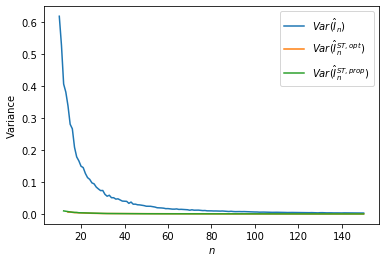

In [10]:
def I_st5_opti(n1,n2) :
    In1 = 0
    In2 = 0
    In = 0
    u1 = rd.uniform(0,1/3,n1)
    u2 = rd.uniform(1/3,1,n2)
    for i in range(n1) :
        In1 += f(u1[i])
    In1 = In1/(3*n1)
    for i in range(n2):
        In2 += f(u2[i])
    In2 = 2*In2/(3*n2)
    In = In1 + In2
    return(In)

def var_I_st_opti(n1,n2,p) :
    x = []
    y = []
    prop = n1/(n1+n2)
    for i in range(1,n1+n2+1) :
        L = []
        i1 = int(prop*i)
        i2 = i - i1
        if (i1 > 0 and i2 > 0):
            x.append(i)
            for j in range(p) :
                L.append(I_st5_opti(i1,i2))
            y.append(n*np.var(L)/i)
    return [x,y]

n = 150
p = 1000
n1_opt = int(n/5)
n1_prop = int(n/3)

y = var_I(n,p)
x_opt,y_opt = var_I_st_opti(n1_opt,n-n1_opt,p)
x_prop,y_prop = var_I_st_opti(n1_prop,n-n1_prop,p)

plt.xlabel("$n$")
plt.ylabel("Variance")

plt.plot(range(10,n+1),y[9:])
plt.plot(x_opt[9:],y_opt[9:])
plt.plot(x_prop[9:],y_prop[9:])

plt.legend(["$Var(\hat I_n)$","$Var(\hat I^{ST,opt}_n)$","$Var(\hat I^{ST,prop}_n)$"])

> **Question 6.**  **Variable de contrôle.**

> **6.a** Donner l'expression du polynôme $p(x)$ de degré $2$ qui interpole $f(x)$ aux points $0$, $\frac{1}{2}$ et $1$. 

<font color='blue'>

Soit $p(x) = a_0 + a_1 x + a_2 x^2$ <br>
$p(0) = f(0)$, $p(\frac12) = f(\frac12)$ et $p(1) = f(1)$ <br>
D'où 
    $$ p(x) = 1-\frac{3}{10}x - \frac{1}{5} x^2$$

> **6.b** Proposer un estimateur $\hat I^{VC}$ de $\pi$ en utilisant $p(U)$ comme variable de contrôle, où $U$ est une variable uniforme sur $[0,1]$.

<font color='blue'>
Un estimateur $\hat I^{VC}$ de $\pi$ en utilisant p(U) comme variable de contrôle est :
$$
\hat I^{VC} = \frac{1}{n} \sum_{i=1}^n (f(U_i) - p(U_i)) + E(p(U))
$$

> **6.c** Comparer numériquement la variance de cette estimateur avec celle de $\hat I_n$. 

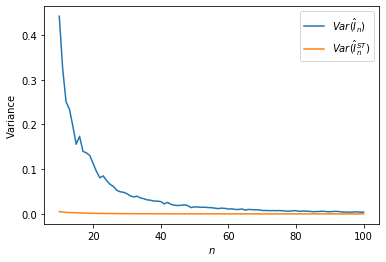

In [11]:
def poly(x):
    return(1-(3/10)*x-(1/5)*(x**2))

def I_vc(n):
    I = 0
    u = rd.uniform(0,1,n)
    P = []
    for i in range(n) :
        I += f(u[i]) + poly(u[i])
        P.append(poly(u[i]))
    return((I/n)+np.mean(P))

def var_I_vc(n,p):
    L = []
    for i in range(1,n+1):
        ivc = []
        for j in range(p) :
            ivc.append(I_vc(i))
        L.append(n*np.var(ivc)/i)
    return(L)

n = 100
p = 500

y = var_I(n,p)
y_vc = var_I_vc(n,p)

plt.xlabel("$n$")
plt.ylabel("Variance")

plt.plot(range(10,n+1),y[9:])
plt.plot(range(10,n+1),y_st[9:])

plt.legend(["$Var(\hat I_n$)","$Var(\hat I^{ST}_n)$"])